## EXERCISES
1. Create the class `KnnClassifier`, with the following constructor:
        def __init__(self, train_images, train_labels):
            self.train_images = train_images
            self.train_labels = train_labels

2.  Define method `classify_image(self, test_image, num_neighbours=3, metric='l2')`
    which classifies the `test_image` with the "nearest k neighbours" method.

    The neighbour number is the parameter `num_neighbours`, and the distance
    can be either `L1` or `L2`, given by the parameter metric.

    **Note:**

    $L_1(X, Y) = \sum_{i=1}^{n}|X_i - Y_i|$

    $L_2(X, Y) = \sqrt{\sum_{i=1}^{n}(X_i - Y_i)^2}$

     the variables train_images and test_image, the value of an example
     are stocked on one row:
            train_images.shape = (num_samples, num_features)
            test_image.shape = (1, num_features)

3. Calculate the accuracy of the nearest neighbours method on the testing data
   using the L2 distance and 3 neighbours. Save the predictions in a file named
   `predictions_mnist_l2_3nn.txt`.

   **Note:** the accuracy on the testing data should be `89.8%`.


4. Calculate the accuracy on the testing data using the L2 distance and the number of
   neighbours in `{1, 3, 5, 7, 9}`.

   (a) Plot a graphic of the accuracy for each neighbour number and save the scores in the
      `L2_accuracy.txt file`.

   (b) Repeat the previous step for the L1 distance. Plot the previous graphic in the same
      figure as the current graphic (use the `L2_accuracy.txt` file).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

plt.style.use('default')
plt.rcParams['figure.dpi'] = 70

In [2]:
# loading all the necessary images
train_images = np.loadtxt('data_MNIST/data/train_images.txt')
test_images = np.loadtxt('data_MNIST/data/test_images.txt')
# loading the labels as integers
train_labels = np.loadtxt('data_MNIST/data/train_labels.txt', dtype=np.int32)
test_labels = np.loadtxt('data_MNIST/data/test_labels.txt', dtype=np.int32)

#### Exercise 1.

In [3]:
class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels

    def calculate_dists(self, test_image, metric):
        if metric == 'l2':
            pwr = np.power(self.train_images - test_image, 2)
            distances = np.sum(pwr, axis=1)
            return np.sqrt(distances)
        else:
            return np.sum(np.abs(self.train_images - test_image), axis=1)

    def classify_image(self, test_image, num_neighbours=3, metric='l2'):
        distances = self.calculate_dists(test_image, metric)

        # sorting the distances
        indexes = np.argsort(distances)

        # getting the first num_neighbours NN
        neighbours = indexes[:num_neighbours]
        n_labels = self.train_labels[neighbours]

        # counting the votes
        votes = np.bincount(n_labels)

        return np.argmax(votes)

#### Exercise 2.

In [4]:
classifier = KnnClassifier(train_images, train_labels)
classifier.classify_image(test_images[10], 3, 'l2')

7

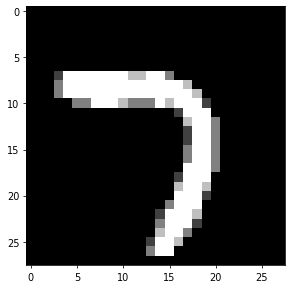

In [5]:
plt.imshow(test_images[10].astype(np.uint8).reshape((28, 28)), cmap='gray')

2


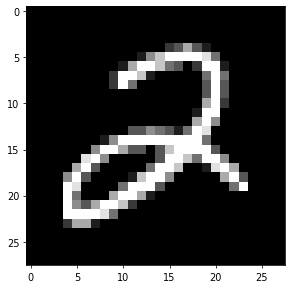

7


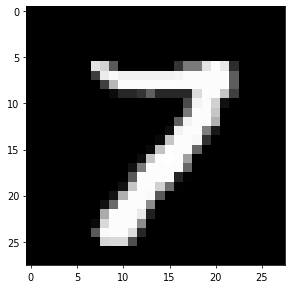

3


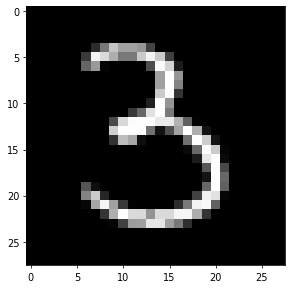

1


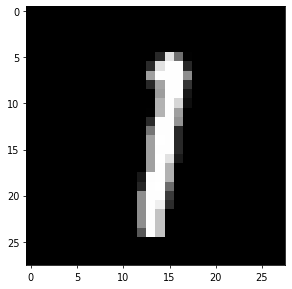

2


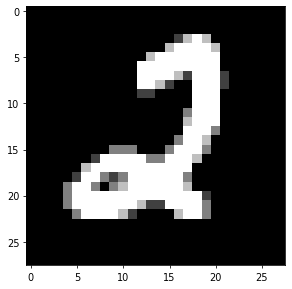

In [6]:
for i in range(5):
    prediction = classifier.classify_image(test_images[i], 3, 'l2')
    print(prediction)

    train_images[i].reshape((28, 28))
    plt.imshow(test_images[i].astype(np.uint8).reshape((28,28)), cmap='gray')
    plt.show()

#### Exercise 3.

In [7]:
y_pred = np.zeros(test_images.shape[0])

for index, image in enumerate(test_images):
    y_pred[index] = classifier.classify_image(image)

print(metrics.accuracy_score(test_labels, y_pred))

np.savetxt('predictions_mnist_l2_3nn.txt', y_pred)

0.898


#### Exercise 4.

1 0.884
3 0.898
5 0.896
7 0.88
9 0.88


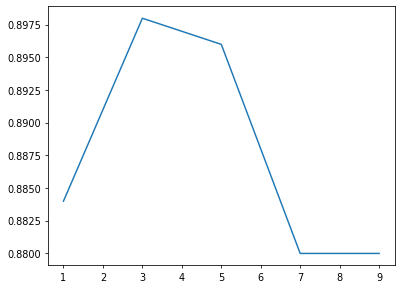

In [8]:
x = [1, 3, 5, 7, 9]
accuraciesL2 = []
for num in x:
    y_pred = np.zeros(test_images.shape[0])

    for index, image in enumerate(test_images):
        y_pred[index] = classifier.classify_image(image, num_neighbours=num)

    accuracy = metrics.accuracy_score(test_labels, y_pred)
    print(num, accuracy)
    accuraciesL2.append(accuracy)

plt.plot(x, accuraciesL2)
plt.show()

np.savetxt('L2_accuracy.txt', accuraciesL2)

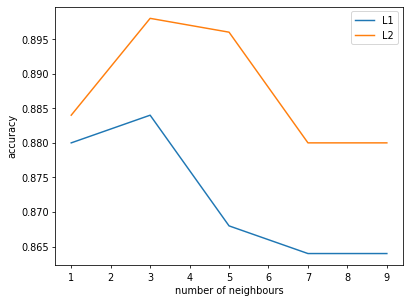

In [9]:
x = [1, 3, 5, 7, 9]
accuraciesL1 = []
for num in x:
    y_pred = np.zeros(test_images.shape[0])

    for index, image in enumerate(test_images):
        y_pred[index] = classifier.classify_image(image, num_neighbours=num, metric='l1')

    accuraciesL1.append(metrics.accuracy_score(test_labels, y_pred))

accuraciesL2 = np.loadtxt('L2_accuracy.txt')

plt.plot(x, accuraciesL1)
plt.plot(x, accuraciesL2)
plt.legend(['L1', 'L2'])
plt.xlabel('number of neighbours')
plt.ylabel('accuracy')
plt.show()

np.savetxt('L1_accuracy.txt', accuraciesL1)